In [1]:
import os
import kagglehub
import pandas as pd


path = kagglehub.dataset_download("PromptCloudHQ/imdb-data")
print("Path to dataset files:", path)
files = os.listdir(path)
print("Files in dataset directory:", files)
csv_file_path = os.path.join(path, 'IMDB-Movie-Data.csv')
#Replace with the actual filename
data = pd.read_csv(csv_file_path)
print(data.columns)
print(data['Title'][1])
print(data['Genre'][1])
print(data['Description'][1])


100%|██████████| 134k/134k [00:00<00:00, 25.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/PromptCloudHQ/imdb-data/versions/1
Files in dataset directory: ['IMDB-Movie-Data.csv']
Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
Prometheus
Adventure,Mystery,Sci-Fi
Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.


In [8]:
#preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
print(stop_words)
lemmatizer = WordNetLemmatizer()

#sample
tokens = nltk.word_tokenize(data['Description'][4].lower())
print(tokens)
filtered_tokens = [lemmatizer.lemmatize(token) for token in
tokens if token not in stop_words and token.isalnum()]
print(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'itself', 'were', 'what', 'doing', "you'll", 'herself', "hadn't", 'but', 'couldn', 'now', 'more', "you'd", 'haven', "haven't", "shouldn't", 'can', "should've", 'nor', 'had', 'whom', 'few', 'needn', 'yourselves', 'his', 'myself', 'any', "wasn't", 'under', 'wouldn', 've', 'ours', "don't", 'himself', 'd', 'hasn', 'an', "weren't", 'all', 'our', 'again', 'should', 'if', 'you', 'once', "you're", "that'll", 'won', 'did', 'by', "mightn't", 'he', 'only', 'we', 'both', 'the', 'then', 'having', 'of', 'isn', 'ma', 'shan', 'themselves', "isn't", 'as', 'so', 'above', 'am', "needn't", "hasn't", 'be', 'because', 'those', 'yours', 'and', 'which', 'there', 'will', 'with', 'below', 'theirs', 'here', 'doesn', 'or', 'they', 'very', "didn't", 'from', 'it', 'been', 'not', 'other', 'm', 'don', "won't", 'further', 'o', 'some', 'her', 'down', 'll', "she's", 'how', 'same', 'your', 'between', 'being', 's', 'mightn', 'my', 'on', 'mustn', 'weren', 'such', 'before', 'over', 't', 'them', 'is', 'yourself', "it's", 'i

In [9]:
def preprocess(text):
  tokens = nltk.word_tokenize(text.lower())
  filtered_tokens = [lemmatizer.lemmatize(token) for token in
  tokens if token not in stop_words and token.isalnum()]
  return " ".join(filtered_tokens)

In [10]:
data['preprocessed'] = data['Description'].apply(preprocess)

#padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['preprocessed'])
sequences = tokenizer.texts_to_sequences(data['preprocessed'])
word_index = tokenizer.word_index
padded = pad_sequences(sequences, maxlen=300)
print(padded[500])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [11]:

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip



--2024-11-18 03:10:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-18 03:10:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-18 03:10:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [12]:
import numpy as np

embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

data['Genre'] = data['Genre'].apply(lambda x: x.split(','))
print(data['Genre'])
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data['Genre'])
print(genres_encoded[2])
print(mlb.classes_)

0       [Action, Adventure, Sci-Fi]
1      [Adventure, Mystery, Sci-Fi]
2                [Horror, Thriller]
3       [Animation, Comedy, Family]
4      [Action, Adventure, Fantasy]
                   ...             
995         [Crime, Drama, Mystery]
996                        [Horror]
997         [Drama, Music, Romance]
998             [Adventure, Comedy]
999       [Comedy, Family, Fantasy]
Name: Genre, Length: 1000, dtype: object
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']


In [14]:
#print(len(list(tokenizer.word_index.items())))


embed_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embed_vector = embeddings_index.get(word)
    if embed_vector is not None:
      embed_matrix[i] = embed_vector

print(embed_matrix[2])

[ 0.27827999  0.49947     0.24943    -0.68330997 -0.24754     0.93738002
  0.18961    -0.44422001 -0.33965001 -0.18938001 -0.10852    -0.47231001
  0.30958     0.058438    0.63569999 -0.47887999  0.46168    -0.12471
 -0.43198001  0.73152     0.079954   -0.59605998  0.012239   -0.23816
  0.64160001  0.23203    -0.40434    -0.83525002  0.10051     0.73958999
 -0.34003001  0.66995001  0.40713    -0.47383001  0.034505   -0.48907
 -0.22336     0.99294001  0.013465    0.089224   -0.84092999 -0.082551
 -0.29919001 -0.15525     0.2429     -0.13256    -0.15973     0.036625
  0.24643999  0.25459999 -0.62690997 -1.01960003 -0.30930001  0.80447
  0.18698999 -2.09290004 -0.55539    -0.12847     1.30239999 -0.010272
  0.1683      1.09990001 -0.11304     0.029322    0.83424997  0.20253
  1.01100004  0.59684002  0.25211     0.046341    0.54534    -0.18607
 -1.14999998 -0.39846    -0.080683    0.36930999 -0.15826    -0.099494
 -0.041378   -1.21519995  1.18900001  0.62548     0.11624    -0.28575
 -1.632

In [17]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Input, Dropout
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

#print(len(data['Title'].values))
#print(len(padded))
#print(len(genres_encoded))

#model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[embed_matrix], trainable=True))
model.add(SimpleRNN(units=150, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(len(mlb.classes_), activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

X = padded
Y = genres_encoded

print(padded.shape)
print(len(tokenizer.word_index))

X_train, X_val, X_test = X[:700], X[700:800], X[800:]
Y_train, Y_val, Y_test = Y[:700], Y[700:800], Y[800:]

(1000, 300)
5148


In [19]:
from keras.callbacks import ReduceLROnPlateau

model.summary()
history1 = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val), callbacks=[ReduceLROnPlateau()], )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 300, 100)            │         514,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           3,020 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,666,712 (6.36 MB)

 Trainable params: 555,570 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,111,142 (4.24 MB)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.0993 - loss: 0.6122 - val_accuracy: 0.1500 - val_loss: 0.3846 - learning_rate: 0.0010
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.1852 - loss: 0.3749 - val_accuracy: 0.1500 - val_loss: 0.3271 - learning_rate: 0.0010
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.2266 - loss: 0.3379 - val_accuracy: 0.1500 - val_loss: 0.3223 - learning_rate: 0.0010
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.2274 - loss: 0.3335 - val_accuracy: 0.1500 - val_loss: 0.3222 - learning_rate: 0.0010
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.2296 - loss: 0.3274 - val_accuracy: 0.1500 - val_loss: 0.3200 - learning_rate: 0.0010
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - accuracy: 0.2315 - loss: 0.3190 - val_accuracy: 0.1500 - val_loss: 0.3179 - learning_rate: 0.0010
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.2463 - loss: 0.3215 - 

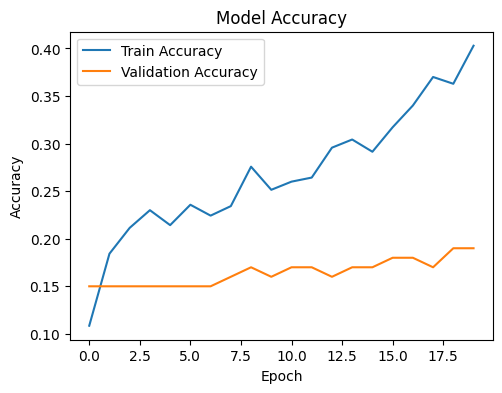

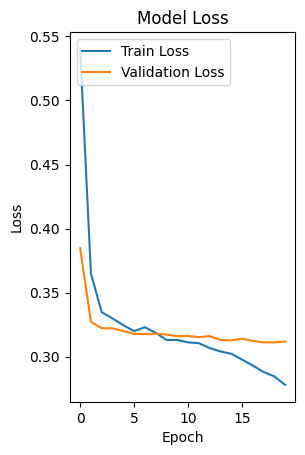

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy RNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper left')

plt.show()
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss RNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='micro')
recall = recall_score(Y_test, y_pred_classes, average='micro')
f1 = f1_score(Y_test, y_pred_classes, average='micro')

print(f'\nTest Accuracy: {test_accuracy}\nTest Loss: {test_loss}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}\n")

misclassified = np.where(np.any(Y_test != y_pred_classes, axis=1))[0]

# Analyze misclassified instances and suggest improvements
for idx in misclassified[:5]:
    print(f"Movie: {data['Title'][idx]}")
    print(f"Actual genres: {', '.join(data['Genre'][idx])}")
    print(f"Predicted genres: {', '.join(mlb.classes_[y_pred_classes[idx] == 1])}")
    print()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.2893 - loss: 0.3125
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step

Test Accuracy: 0.30000001192092896
Test Loss: 0.3064471185207367
Precision: 0.5913978494623656
Recall: 0.22357723577235772
F1 Score: 0.32448377581120946

Movie: Guardians of the Galaxy
Actual genres: Action, Adventure, Sci-Fi
Predicted genres: Action

Movie: Prometheus
Actual genres: Adventure, Mystery, Sci-Fi
Predicted genres: Drama

Movie: Split
Actual genres: Horror, Thriller
Predicted genres: Action

Movie: Sing
Actual genres: Animation, Comedy, Family
Predicted genres: Action

Movie: Suicide Squad
Actual genres: Action, Adventure, Fantasy
Predicted genres: Action



In [28]:
#LSTM
from keras.layers import LSTM
from tensorflow.keras import regularizers

model = Sequential()
model.add(Embedding(len(word_index) + 1, output_dim=100, weights=[embed_matrix], input_length=300, trainable=False))
model.add(LSTM(units=256, activation='sigmoid', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(20, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.summary()
history2 = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val), callbacks=[ReduceLROnPlateau()])

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='micro')
recall = recall_score(Y_test, y_pred_classes, average='micro')
f1 = f1_score(Y_test, y_pred_classes, average='micro')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 300, 100)            │         514,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,627,026 (6.21 MB)

 Trainable params: 370,708 (1.41 MB)

 Non-trainable params: 514,900 (1.96 MB)

 Optimizer params: 741,418 (2.83 MB)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4036 - loss: 0.2516 - val_accuracy: 0.2400 - val_loss: 0.2894 - learning_rate: 0.0010
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3747 - loss: 0.2547 - val_accuracy: 0.2200 - val_loss: 0.2875 - learning_rate: 0.0010
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4088 - loss: 0.2505 - val_accuracy: 0.2400 - val_loss: 0.2875 - learning_rate: 0.0010
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4056 - loss: 0.2469 - val_accuracy: 0.2400 - val_loss: 0.2866 - learning_rate: 0.0010
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4100 - loss: 0.2466 - val_accuracy: 0.2500 - val_loss: 0.2872 - learning_rate: 0.0010
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4072 - loss: 0.2468 - val_accuracy: 0.2300 - val_loss: 0.2864 - learning_rate: 0.0010
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3791 - loss: 0.2474 - val_accuracy: 

In [39]:
print(f'\nTest Accuracy: {test_accuracy}\nTest Loss: {test_loss}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}\n\n")

misclassified = np.where(np.any(Y_test != y_pred_classes, axis=1))[0]

# Analyze misclassified instances and suggest improvements
for idx in misclassified[:5]:
    print(f"Movie: {data['Title'][idx]}")
    print(f"Actual genres: {', '.join(data['Genre'][idx])}")
    print(f"Predicted genres: {', '.join(mlb.classes_[y_pred_classes[idx] == 1])}")
    print()


Test Accuracy: 0.3149999976158142
Test Loss: 0.27997025847435
Precision: 0.5842696629213483
Recall: 0.3170731707317073
F1 Score: 0.41106719367588934


Movie: Guardians of the Galaxy
Actual genres: Action, Adventure, Sci-Fi
Predicted genres: Action, Adventure, Sci-Fi

Movie: Prometheus
Actual genres: Adventure, Mystery, Sci-Fi
Predicted genres: Drama

Movie: Split
Actual genres: Horror, Thriller
Predicted genres: Action, Adventure

Movie: Sing
Actual genres: Animation, Comedy, Family
Predicted genres: Action, Crime, Drama

Movie: Suicide Squad
Actual genres: Action, Adventure, Fantasy
Predicted genres: 



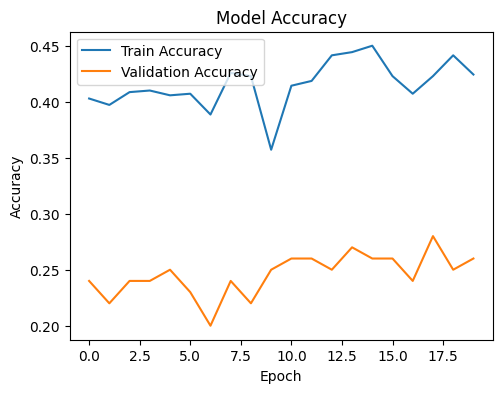

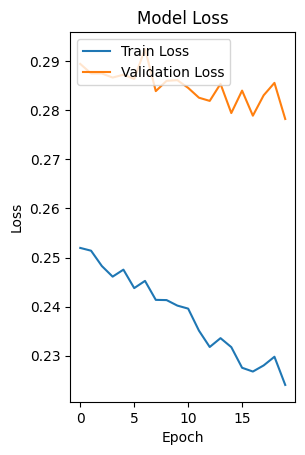

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper left')

plt.show()
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()